# Exploratory Data Analysis

In [0]:
# load libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# local urls
uom_space_url = '../project-data/uom-space.xlsx'
rm_category_type_url = '../project-data/rm-category-type-cleaned.xlsx'
em_location_url = '../project-data/em-location.xlsx'
av_equipment_url = '../project-data/av-equipment.xlsx'
timetable_2020_url = '../project-data/2020-timetable-v2.xlsx'
floor_name_url = '../project-data/fl-name-cleaned.xlsx'

# drive urls
uom_space_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/uom-space.xlsx'
rm_category_type_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/rm-category-type-cleaned.xlsx'
em_location_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/em-location.xlsx'
av_equipment_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/av-equipment.xlsx'
timetable_2020_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/2020-timetable-v2.xlsx'
floor_name_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/fl-name-cleaned.xlsx'

In [0]:
uom_space_df = pd.read_excel(uom_space_url)

In [0]:
rm_category_type_df = pd.read_excel(rm_category_type_url)

In [0]:
em_location_df = pd.read_excel(em_location_url)

In [0]:
av_equipment_df = pd.read_excel(av_equipment_url)

In [0]:
timetable_df = pd.read_excel(timetable_2020_url)

In [0]:
floor_df = pd.read_excel(floor_name_url)

In [10]:
# data shapes
print("UOM space shape:"+str(uom_space_df.shape))
print("RM category:"+str(rm_category_type_df.shape))
print("EM location:"+str(em_location_df.shape))
print("AV equipment:"+str(av_equipment_df.shape))
print("2020 timetable:"+str(timetable_df.shape))
print("Floor data shape:"+str(floor_df.shape))

UOM space shape:(22166, 14)
RM category:(209, 5)
EM location:(7709, 4)
AV equipment:(1964, 11)
2020 timetable:(131857, 23)
Floor data shape:(1369, 3)


## Space Data Analysis

#### Statistics

In [0]:
uom_space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22166 entries, 0 to 22165
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campus Code             22166 non-null  object 
 1   Building Code           22166 non-null  object 
 2   Building Name           22166 non-null  object 
 3   Floor Code              22166 non-null  object 
 4   Room Code               22166 non-null  object 
 5   Room Name               1791 non-null   object 
 6   Room Category           22166 non-null  int64  
 7   Room Type               22166 non-null  int64  
 8   Room Type Abbreviation  22166 non-null  object 
 9   Room Capacity           20412 non-null  float64
 10  Room Area m²            22166 non-null  float64
 11  Room Condition 2018     18543 non-null  object 
 12  Department Code         22166 non-null  object 
 13  Room Location Code      22166 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [0]:
uom_space_df.head()

,Campus Code,Building Code,Building Name,Floor Code,Room Code,Room Name,Room Category,Room Type,Room Type Abbreviation,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code
0,PAR,101,BEAUREPAIRE CENTRE,0,CG01,NaN,6,631,Circ-Department,0.0,80.62,NaN,8490,PAR;101;0;CG01
1,PAR,101,BEAUREPAIRE CENTRE,0,CG02,NaN,8,805,Circulation,0.0,12.00,NaN,UNIGEN,PAR;101;0;CG02
2,PAR,101,BEAUREPAIRE CENTRE,0,CG03,NaN,6,631,Circ-Department,0.0,14.12,NaN,8490,PAR;101;0;CG03
3,PAR,101,BEAUREPAIRE CENTRE,0,CG04,NaN,8,805,Circulation,0.0,11.01,NaN,UNIGEN,PAR;101;0;CG04
4,PAR,101,BEAUREPAIRE CENTRE,0,G02,NaN,6,623,Waiting/Foyer,0.0,57.35,NaN,8490,PAR;101;0;G02


In [0]:
# data stats
stats_uom_space = {
    'Stats':['Campuses','Buildings','Floor Codes','Total Rooms','Rooms Types','Room Categories','Room Condition','Departments'],
    'Count':[
             len(uom_space_df.groupby('Campus Code')),
             len(uom_space_df.groupby('Building Code')),
             len(uom_space_df.groupby('Floor Code')),
             len(uom_space_df.groupby('Room Code')),
             len(uom_space_df.groupby('Room Type')),
             len(uom_space_df.groupby('Room Category')),
             len(uom_space_df.groupby('Room Condition 2018')),
             len(uom_space_df.groupby('Department Code'))
    ]
}
stats = pd.DataFrame(data=stats_uom_space)
stats

,Stats,Count
0,Campuses,7
1,Buildings,331
2,Floor Codes,28
3,Total Rooms,5703
4,Rooms Types,185
5,Room Categories,8
6,Room Condition,6
7,Departments,122


#### How many buildings/Rooms distributed per campus?

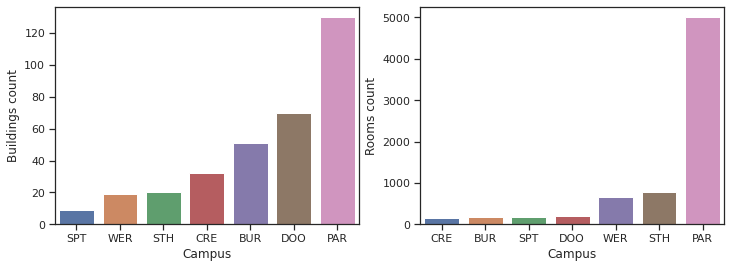

In [0]:
gdf1 = uom_space_df.groupby(by='Campus Code', as_index=False).agg({'Building Code': pd.Series.nunique})
gdf1.sort_values(by=['Building Code'], inplace=True)

gdf2 = uom_space_df.groupby(by='Campus Code', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(12)
ax1 = sns.barplot(x="Campus Code", y='Building Code', data=gdf1, ax=ax[0]);
ax1.set(xlabel='Campus', ylabel='Buildings count')
ax2 = sns.barplot(x="Campus Code", y='Room Code', data=gdf2, ax=ax[1]);
ax2.set(xlabel='Campus', ylabel='Rooms count')
plt.show()

### Merging data with category type + floors for more information

In [0]:
uom_space_df.shape

(22166, 14)

In [0]:
floor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Building Code  1369 non-null   object
 1   Floor Code     1369 non-null   object
 2   Floor Name     1369 non-null   object
dtypes: object(3)
memory usage: 32.2+ KB


In [0]:
# data cleaning
uom_space_df['Room Type']=uom_space_df['Room Type'].astype(str).str.strip()
uom_space_df['Room Category']=uom_space_df['Room Category'].astype(str).str.strip()

rm_category_type_df['Room Type']=rm_category_type_df['Room Type'].astype(str).str.strip()
rm_category_type_df['Room Category']=rm_category_type_df['Room Category'].astype(str).str.strip()
rm_category_type_df['Room Type Abbreviation']=rm_category_type_df['Room Type Abbreviation'].str.lower().str.strip()
rm_category_type_df['Description']=rm_category_type_df['Description'].str.lower().str.strip()
rm_category_type_df['Room Type Definition']=rm_category_type_df['Room Type Definition'].str.lower().str.strip()

floor_df['Building Code'] = floor_df['Building Code'].astype(str).str.strip()
floor_df['Floor Code'] = floor_df['Floor Code'].astype(str).str.strip()
floor_df['Floor Name'] = floor_df['Floor Name'].astype(str).str.strip()

In [13]:
uom_space_df_enhanced = pd.merge(uom_space_df,floor_df,on=['Building Code','Floor Code'])
uom_space_df_enhanced.shape

(22166, 15)

In [14]:
# merged data
# !! perfect match !!
merged_space_data_df = pd.merge(uom_space_df_enhanced,rm_category_type_df,on=['Room Category','Room Type'])
merged_space_data_df.shape

(22166, 18)

In [0]:
merged_space_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22166 entries, 0 to 22165
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Campus Code               22166 non-null  object 
 1   Building Code             22166 non-null  object 
 2   Building Name             22166 non-null  object 
 3   Floor Code                22166 non-null  object 
 4   Room Code                 22166 non-null  object 
 5   Room Name                 1791 non-null   object 
 6   Room Category             22166 non-null  object 
 7   Room Type                 22166 non-null  object 
 8   Room Type Abbreviation_x  22166 non-null  object 
 9   Room Capacity             20412 non-null  float64
 10  Room Area m²              22166 non-null  float64
 11  Room Condition 2018       18543 non-null  object 
 12  Department Code           22166 non-null  object 
 13  Room Location Code        22166 non-null  object 
 14  Floor 

### Analysis for parkville campus

In [0]:
uom_space_df_parkville = merged_space_data_df[merged_space_data_df['Campus Code']=='PAR']

#### How is room types distributed across buildings?

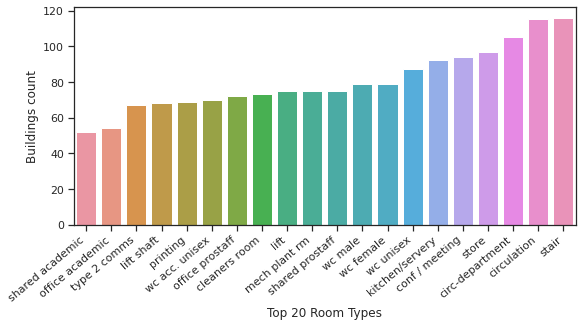

In [0]:
gdf = uom_space_df_parkville.groupby(by=['Room Type','Room Type Abbreviation_y'], as_index=False).agg({'Building Code': pd.Series.nunique})
gdf.sort_values(by=['Building Code'], inplace=True)
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Room Type Abbreviation_y", y='Building Code', data=gdf.tail(20));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Room Types', ylabel='Buildings count')
plt.show()

#### How are rooms distributed across possible floors?

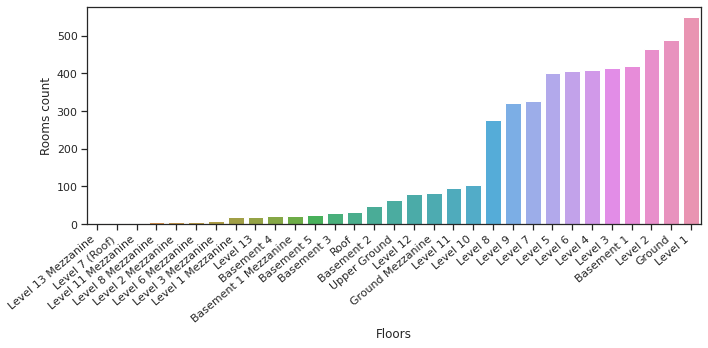

In [0]:
gdf = uom_space_df_parkville.groupby(by=['Floor Name'], as_index=False).agg({'Room Code': pd.Series.nunique})
gdf.sort_values(by=['Room Code'], inplace=True)
plt.figure(figsize=(11,4))
ax = sns.barplot(x="Floor Name", y='Room Code', data=gdf);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Floors', ylabel='Rooms count')
plt.show()

#### How is the category of rooms distributed?

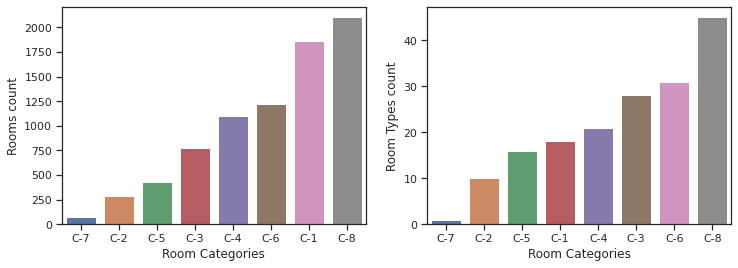

In [0]:
gdf1 = uom_space_df_parkville.groupby(by='Room Category', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)
for idx,row in gdf1.iterrows():
    gdf1.at[idx,'Room Category'] = 'C-'+row['Room Category']

gdf2 = uom_space_df_parkville.groupby(by='Room Category', as_index=False).agg({'Room Type': pd.Series.nunique})
gdf2.sort_values(by=['Room Type'], inplace=True)
for idx,row in gdf2.iterrows():
    gdf2.at[idx,'Room Category'] = 'C-'+row['Room Category']

# plot
fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(12)
ax1 = sns.barplot(x="Room Category", y='Room Code', data=gdf1, ax=ax[0]);
ax1.set(xlabel='Room Categories', ylabel='Rooms count')
ax2 = sns.barplot(x="Room Category", y='Room Type', data=gdf2, ax=ax[1]);
ax2.set(xlabel='Room Categories', ylabel='Room Types count')
plt.show()

#### How is room capacity and Room Area $m^2$ distributed in data?

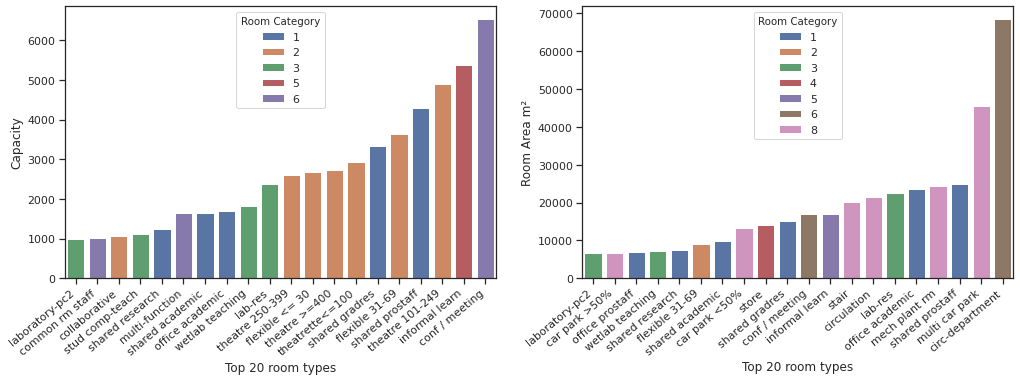

In [0]:
gdf1 = uom_space_df_parkville.groupby(by=['Room Type','Room Category','Room Type Abbreviation_y'], as_index=False)['Room Capacity'].sum()
gdf1.sort_values(by=['Room Capacity'], inplace=True)

gdf2 = uom_space_df_parkville.groupby(by=['Room Type','Room Category','Room Type Abbreviation_y'], as_index=False)['Room Area m²'].sum()
gdf2.sort_values(by=['Room Area m²'], inplace=True)

# top 30 rooms
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(17)
ax1 = sns.barplot(x="Room Type Abbreviation_y", y='Room Capacity', hue="Room Category", data=gdf1.tail(20), dodge=False, ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 room types', ylabel='Capacity')
ax2 = sns.barplot(x="Room Type Abbreviation_y", y='Room Area m²', hue="Room Category", data=gdf2.tail(20), dodge=False, ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 room types', ylabel='Room Area m²')
plt.show()

#### How is room condition distributed across different rooms?

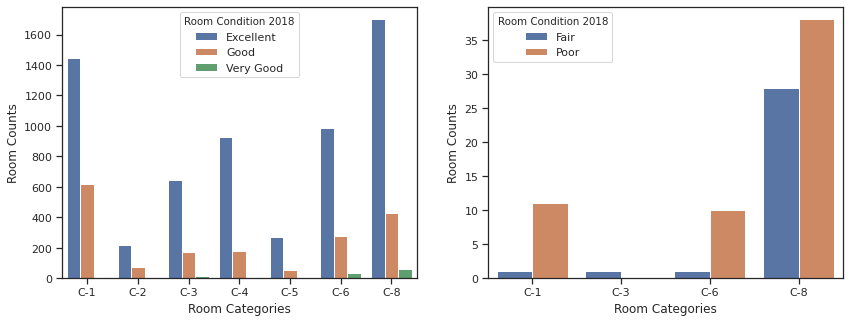

In [0]:
gdf = uom_space_df_parkville.groupby(by=['Room Condition 2018','Room Category'], as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1 = gdf.loc[(gdf['Room Condition 2018'] == 'Excellent')|(gdf['Room Condition 2018'] == 'Very Good')|(gdf['Room Condition 2018'] == 'Good')]
gdf2 = gdf.loc[(gdf['Room Condition 2018'] == 'Fair')|(gdf['Room Condition 2018'] == 'Poor')]

for idx,row in gdf1.iterrows():
    gdf1.at[idx,'Room Category'] = 'C-'+row['Room Category']

for idx,row in gdf2.iterrows():
    gdf2.at[idx,'Room Category'] = 'C-'+row['Room Category']

# plot
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(14)
ax1 = sns.barplot(x="Room Category", y='Room Code', hue="Room Condition 2018", data=gdf1, dodge=True,ax=ax[0])
ax1.set(xlabel='Room Categories', ylabel='Room Counts')
ax2 = sns.barplot(x="Room Category", y='Room Code', hue="Room Condition 2018", data=gdf2, dodge=True,ax=ax[1])
ax2.set(xlabel='Room Categories', ylabel='Room Counts')
plt.show()

#### How are departments distributed across rooms and categories?

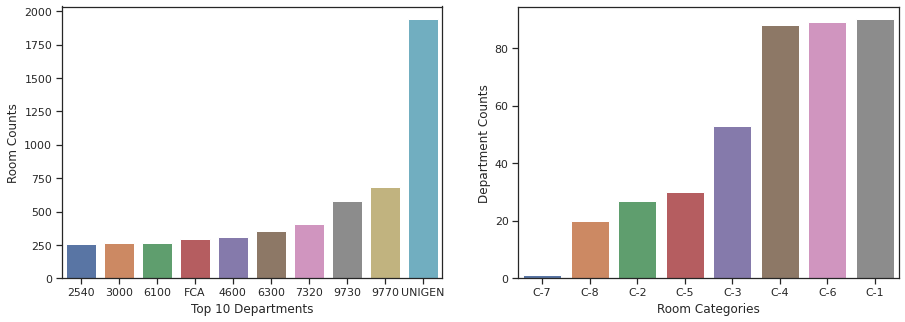

In [0]:
gdf1 = uom_space_df_parkville.groupby(by=['Department Code'], as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = uom_space_df_parkville.groupby(by=['Room Category'], as_index=False).agg({'Department Code': pd.Series.nunique})
gdf2.sort_values(by=['Department Code'], inplace=True)
for idx,row in gdf2.iterrows():
    gdf2.at[idx,'Room Category'] = 'C-'+row['Room Category']
    
# plot
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Department Code", y='Room Code', data=gdf1.tail(10),dodge=False,ax=ax[0])
ax1.set(xlabel='Top 10 Departments', ylabel='Room Counts')
ax2 = sns.barplot(x="Room Category", y='Department Code',data=gdf2, dodge=True,ax=ax[1])
ax2.set(xlabel='Room Categories', ylabel='Department Counts')
plt.show()

### Room Categories Data Analysis

In [0]:
rm_category_type_df.head()

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
0,1,100,office - other,office - other,"to be used, as the last resort, for any ""offic..."
1,1,101,office academic,office - academic staff,a room with office furniture which provides ac...
2,1,102,office research,office - research staff,a room with office furniture which provides ac...
3,1,103,office grad res,office - graduate researcher,a room with office furniture which provides ac...
4,1,104,off-tech,office - technical/laboratory/store staff,a room with office furniture which provides ac...


In [0]:
rm_category_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Room Category           209 non-null    object
 1   Room Type               209 non-null    object
 2   Room Type Abbreviation  209 non-null    object
 3   Description             209 non-null    object
 4   Room Type Definition    209 non-null    object
dtypes: object(5)
memory usage: 8.3+ KB


In [0]:
# data stats
stats_rm_category = {
    'Stats':['Room Categories','Room Types'],
    'Count':[
             len(rm_category_type_df.groupby('Room Category')),
             len(rm_category_type_df.groupby('Room Type'))
    ]
}
stats = pd.DataFrame(data=stats_rm_category)
stats

,Stats,Count
0,Room Categories,10
1,Room Types,209


In [0]:
rm_category_type_df.groupby(by='Room Category', as_index=False).agg({'Room Type': pd.Series.nunique})

,Room Category,Room Type
0,1,21
1,2,10
2,3,36
3,4,23
4,5,16
5,6,34
6,7,13
7,8,50
8,9,4
9,NON-REPORT,2


In [0]:
# search for rooms with keyword - toilet
possible_rooms = rm_category_type_df[rm_category_type_df['Room Type Definition'].str.contains("toilet|washroom")]
toilet_room_types = possible_rooms['Room Type'].tolist()
possible_rooms

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
148,7,708,stud. ablutions,stud accom-ablutions,"a room containing shower, bath or toilet facil..."
171,8,818,wc acc. unisex,toilet - unisex accessible,includes accessible toilets in all buildings o...
173,8,820,wc female,toilet - female,includes female toilets in all buildings other...
174,8,821,wc male,toilet - male,includes male toilets in all buildings other t...
175,8,822,wc unisex,toilet - unisex,includes unisex toilets in all buildings other...
176,8,823,wc ambulant f,toilet - female ambulant,includes a female ambulatory toilet
177,8,824,wc ambulant m,toilet - male ambulant,includes a male ambulatory toilet
178,8,825,wc acc uni/baby,toilet/baby change - unisex accessible,inculdes unisex accessible toilet and baby cha...
180,8,827,shwr/wc unisex,toilet/shower - unisex,includes both toilet/s and shower. either unis...
181,8,828,shwr/wc female,toilet/shower - female,includes both toilets and shower/s - female. d...


In [0]:
# search for rooms with keyword - meeting
# as per anbin answer
possible_rooms = rm_category_type_df[rm_category_type_df['Room Type'].str.contains("601|629")]
meeting_room_types = possible_rooms['Room Type'].tolist()
possible_rooms

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
107,6,601,conf / meeting,meeting/board/conference room,a room specifically set aside for holding meet...
135,6,629,open meeting,open plan meeting space,a meeting space situated in an open plan area ...


#### How many possible meeting rooms across buildings? (Parkville campus)

In [0]:
possible_meeting_rooms_df = uom_space_df_parkville[uom_space_df_parkville['Room Type'].isin(meeting_room_types)]
possible_meeting_rooms_df.shape

(692, 18)

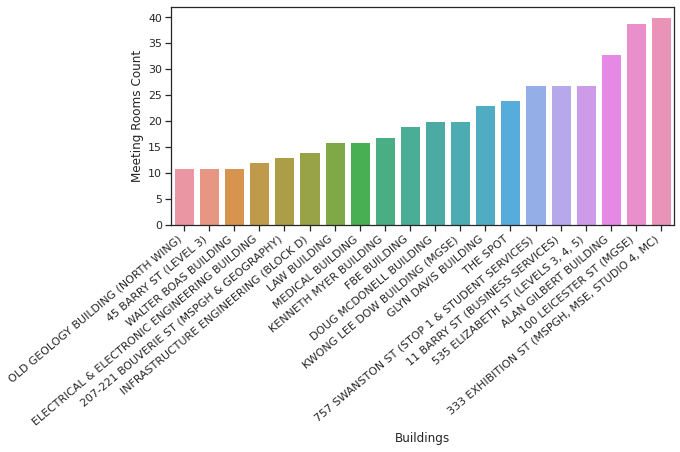

In [0]:
gdf1 = possible_meeting_rooms_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

# Top 20 buildings with the highest number of meeting rooms
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Building Name", y='Room Code', data=gdf1.tail(20));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Buildings', ylabel='Meeting Rooms Count')
plt.show()

#### How many meeting rooms on different floors?

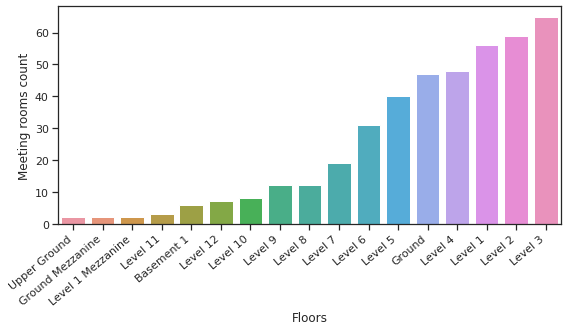

In [0]:
gdf = possible_meeting_rooms_df.groupby(by='Floor Name', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf.sort_values(by=['Room Code'], inplace=True)
# gdf['Floor Code'] = gdf['Floor Code'].astype(str)
# for idx,row in gdf.iterrows():
#     gdf.at[idx,'Floor Code'] = 'Level - '+row['Floor Code']
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Floor Name", y='Room Code', data=gdf);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Floors', ylabel='Meeting rooms count')
plt.show()

#### How many possible toilet facilities across buildings? (Parkville)

In [0]:
possible_toilet_df = uom_space_df_parkville[uom_space_df_parkville['Room Type'].isin(toilet_room_types)]
possible_toilet_df.shape

(1217, 17)

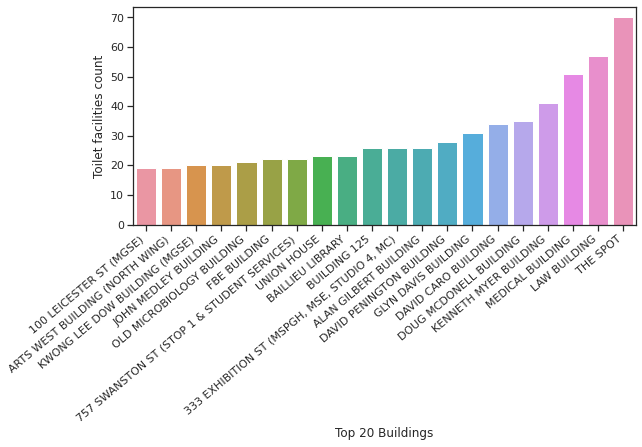

In [0]:
# Top 20 buildings with the highest number of toilet facilities
gdf1 = possible_toilet_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Building Name", y='Room Code', data=gdf1.tail(20));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Toilet facilities count')
plt.show()

## Employee Data Analysis

In [0]:
em_location_df.shape

(7709, 4)

In [0]:
em_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7709 entries, 0 to 7708
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee Sequential ID  7709 non-null   int64 
 1   Building Code           7709 non-null   object
 2   Floor Code              7709 non-null   object
 3   Room Code               7709 non-null   object
dtypes: int64(1), object(3)
memory usage: 241.0+ KB


In [0]:
em_location_df.head()

,Employee Sequential ID,Building Code,Floor Code,Room Code
0,1,102,4,438
1,2,102,0,G21
2,3,102,3,332
3,4,102,3,333
4,5,102,0,B08F


#### Data Cleaning

In [0]:
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype(int)
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype(str).str.strip()

In [0]:
# Data cleaning - Room codes
for idx,row in em_location_df.iterrows():
    if "." in row['Room Code']:
        code = row['Room Code'].split(".")[0]
        em_location_df.at[idx,'Room Code'] = code

#### Stats

In [0]:
# data stats
stats_em_location = {
    'Stats':['Employee Sequential ID','Building Code','Floor Code','Room Code'],
    'Count':[
             len(em_location_df.groupby('Employee Sequential ID')),
             len(em_location_df.groupby('Building Code')),
             len(em_location_df.groupby('Floor Code')),
             len(em_location_df.groupby('Room Code'))
    ]
}
stats = pd.DataFrame(data=stats_em_location)
stats

,Stats,Count
0,Employee Sequential ID,7709
1,Building Code,130
2,Floor Code,13
3,Room Code,1595


#### Merging data for more information

In [0]:
# merged data
merged_em_location_df = pd.merge(em_location_df,merged_space_data_df,on=['Building Code','Floor Code','Room Code'],how='left')
merged_em_location_df.shape

(7709, 19)

In [54]:
# ignoring unable to find metadata rooms
merged_em_location_df_clean = pd.merge(em_location_df,merged_space_data_df,on=['Building Code','Floor Code','Room Code'])
merged_em_location_df_clean.shape

(6962, 19)

In [0]:
# merging with parkville merged data
merged_em_location_df_clean_PAR = pd.merge(em_location_df,uom_space_df_parkville,on=['Building Code','Floor Code','Room Code'])
merged_em_location_df_clean_PAR.shape

(6505, 19)

In [0]:
merged_em_location_df_clean_PAR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6505 entries, 0 to 6504
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee Sequential ID    6505 non-null   int64  
 1   Building Code             6505 non-null   object 
 2   Floor Code                6505 non-null   object 
 3   Room Code                 6505 non-null   object 
 4   Campus Code               6505 non-null   object 
 5   Building Name             6505 non-null   object 
 6   Room Name                 261 non-null    object 
 7   Room Category             6505 non-null   object 
 8   Room Type                 6505 non-null   object 
 9   Room Type Abbreviation_x  6505 non-null   object 
 10  Room Capacity             6502 non-null   float64
 11  Room Area m²              6505 non-null   float64
 12  Room Condition 2018       5786 non-null   object 
 13  Department Code           6505 non-null   object 
 14  Room Loc

#### Rooms for which we are not able to get metadata from space data

In [0]:
merged_em_location_df[merged_em_location_df['Room Type'].isna()]

,Employee Sequential ID,Building Code,Floor Code,Room Code,Campus Code,Building Name,Room Name,Room Category,Room Type,Room Type Abbreviation_x,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code,Floor Name,Room Type Abbreviation_y,Description,Room Type Definition
4,5,102,0,B08F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,15,102,2,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,102,0,G54B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,22,102,0,B22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,46,102,0,B23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,7697,906,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7697,7698,906,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7698,7699,906,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7701,7702,912,0,010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Building 102 have no room code with B08F number on Floor Code 0

In [0]:
merged_space_data_df[merged_space_data_df['Room Code']=='B08F']

,Campus Code,Building Code,Building Name,Floor Code,Room Code,Room Name,Room Category,Room Type,Room Type Abbreviation_x,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code,Floor Name,Room Type Abbreviation_y,Description,Room Type Definition
11907,PAR,102,DAVID PENINGTON BUILDING,0.1,B08F,NaN,3,312,Lab-Res,0.0,486.52,Excellent,7890,PAR;102;0.1;B08F,Basement 1,lab-res,laboratory-research,a laboratory which is used by staff for resear...


#### In which building are most of the employee/staff sitting? (Parkville Campus)

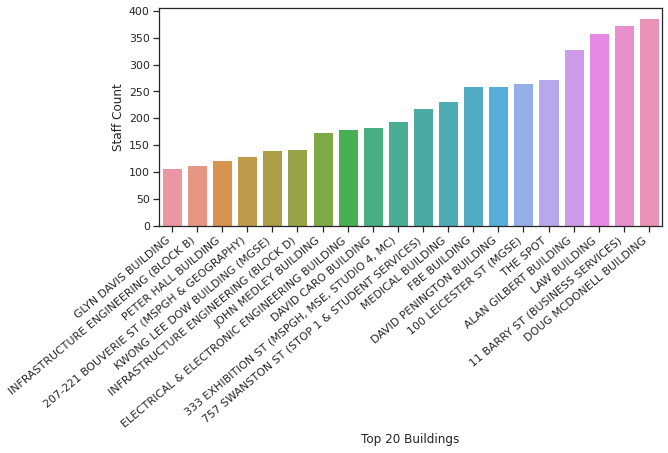

In [0]:
# Top 20 buildings
gdf1 = merged_em_location_df_clean_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf1.sort_values(by=['Employee Sequential ID'], inplace=True)
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Building Name", y='Employee Sequential ID', data=gdf1.tail(20));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Staff Count')
plt.show()

#### How is Room Type and Room Category distributed among Staff members? (Parkville Campus)

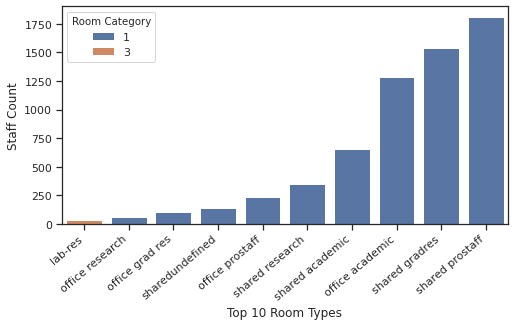

In [0]:
# Top 20 Room Types
gdf1 = merged_em_location_df_clean_PAR.groupby(by=['Room Type','Room Category','Room Type Abbreviation_y'], as_index=False).agg({'Employee Sequential ID': pd.Series.nunique})
gdf1.sort_values(by=['Employee Sequential ID'], inplace=True)
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Room Type Abbreviation_y", y='Employee Sequential ID', hue='Room Category',dodge=False, data=gdf1.tail(10));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 10 Room Types', ylabel='Staff Count')
plt.show()

#### Which floors are generally used by staff members? (Parkville)

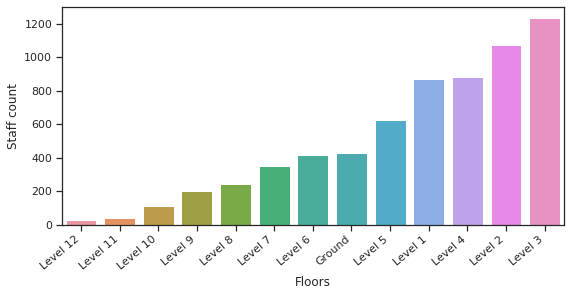

In [0]:
gdf = merged_em_location_df_clean_PAR.groupby(by='Floor Name', as_index=False).agg({'Employee Sequential ID': pd.Series.nunique})
gdf.sort_values(by=['Employee Sequential ID'], inplace=True)
# gdf['Floor Code_x'] = gdf['Floor Code_x'].astype(str)
# for idx,row in gdf.iterrows():
#     gdf.at[idx,'Floor Code_x'] = 'Level - '+row['Floor Code_x']
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Floor Name", y='Employee Sequential ID', data=gdf);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Floors', ylabel='Staff count')
plt.show()

#### How is department distributed among staff members? (Parkville Campus)

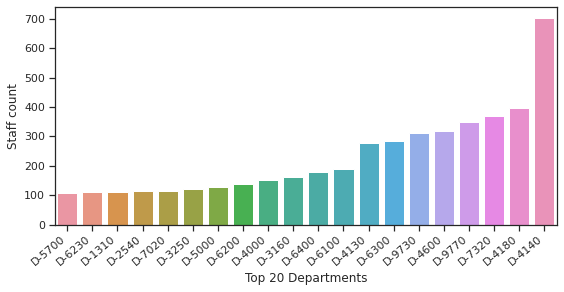

In [0]:
gdf = merged_em_location_df_clean_PAR.groupby(by='Department Code', as_index=False).agg({'Employee Sequential ID': pd.Series.nunique})
gdf.sort_values(by=['Employee Sequential ID'], inplace=True)
for idx,row in gdf.iterrows():
    gdf.at[idx,'Department Code'] = 'D-'+row['Department Code']
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Department Code", y='Employee Sequential ID', data=gdf.tail(20));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Departments', ylabel='Staff count')
plt.show()

## Audio-Visual Equipment Data Analysis

In [0]:
av_equipment_df.shape

(1964, 11)

In [0]:
av_equipment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Equipment Code          1964 non-null   object 
 1   Equipment Standard      1964 non-null   object 
 2   Manufacturer            1964 non-null   object 
 3   Equip. Status           1964 non-null   object 
 4   Building Code           1964 non-null   object 
 5   Floor Code              1964 non-null   float64
 6   Room Code               1964 non-null   object 
 7   Campus Code             1964 non-null   object 
 8   Room Type               1964 non-null   int64  
 9   Room Type Abbreviation  1964 non-null   object 
 10  Room Category           1964 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 168.9+ KB


In [0]:
av_equipment_df.head()

,Equipment Code,Equipment Standard,Manufacturer,Equip. Status,Building Code,Floor Code,Room Code,Campus Code,Room Type,Room Type Abbreviation,Room Category
0,B122-R2-A18,MIC WL HANDHELD,Sennheiser,In service,379,0.1,B131,PAR,217,Collaborative,2
1,B122-R2-A20,WL PRES SYSTEM,Extron,In service,379,0.1,B131,PAR,217,Collaborative,2
2,B122-R2-B07,CONTROL SYSTEM,Extron,In service,379,0.1,B117,PAR,308,Stud Comp-Teach,3
3,B122-R2-B08,WL PRES SYSTEM,Extron,In service,379,0.1,B117,PAR,308,Stud Comp-Teach,3
4,B122-R2-E22,WL PRES SYSTEM,Extron,In service,379,0.1,B116,PAR,308,Stud Comp-Teach,3


#### Stats

In [0]:
# data stats
stats_av_equipment = {
    'Stats':['Equipment Code','Equipment Standard','Manufacturer','Equip. Status','Building Code','Floor Code','Campus Code','Room Type','Room Category'],
    'Count':[
             len(av_equipment_df.groupby('Equipment Code')),
             len(av_equipment_df.groupby('Equipment Standard')),
             len(av_equipment_df.groupby('Manufacturer')),
             len(av_equipment_df.groupby('Equip. Status')),
             len(av_equipment_df.groupby('Building Code')),
             len(av_equipment_df.groupby('Floor Code')),
             len(av_equipment_df.groupby('Campus Code')),
             len(av_equipment_df.groupby('Room Type')),
             len(av_equipment_df.groupby('Room Category'))
    ]
}
stats = pd.DataFrame(data=stats_av_equipment)
stats

,Stats,Count
0,Equipment Code,1964
1,Equipment Standard,33
2,Manufacturer,32
3,Equip. Status,5
4,Building Code,142
5,Floor Code,17
6,Campus Code,11
7,Room Type,82
8,Room Category,8


#### Merge with space data

In [0]:
# clean data
av_equipment_df['Room Type'] = av_equipment_df['Room Type'].astype(str).str.strip()
av_equipment_df['Room Code'] = av_equipment_df['Room Code'].astype(str).str.strip()
av_equipment_df['Building Code'] = av_equipment_df['Building Code'].astype(str).str.strip()
av_equipment_df['Campus Code'] = av_equipment_df['Campus Code'].astype(str).str.strip()
av_equipment_df['Equip. Status'] = av_equipment_df['Equip. Status'].astype(str).str.strip()
av_equipment_df['Floor Code'] = av_equipment_df['Floor Code'].astype(int).astype(str).str.strip()

In [0]:
merged_space_data_df['Floor Code'] = merged_space_data_df['Floor Code'].astype(str).str.strip()

In [0]:
av_equipment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Equipment Code          1964 non-null   object
 1   Equipment Standard      1964 non-null   object
 2   Manufacturer            1964 non-null   object
 3   Equip. Status           1964 non-null   object
 4   Building Code           1964 non-null   object
 5   Floor Code              1964 non-null   object
 6   Room Code               1964 non-null   object
 7   Campus Code             1964 non-null   object
 8   Room Type               1964 non-null   object
 9   Room Type Abbreviation  1964 non-null   object
 10  Room Category           1964 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 168.9+ KB


In [0]:
# merged data
merged_av_equipment_df = pd.merge(av_equipment_df,merged_space_data_df,on=['Campus Code','Building Code','Floor Code','Room Code'], how='left')
merged_av_equipment_df.shape

(1964, 25)

In [0]:
# not able to match records
merged_av_equipment_df[merged_av_equipment_df['Building Name'].isna()]

,Equipment Code,Equipment Standard,Manufacturer,Equip. Status,Building Code,Floor Code,Room Code,Campus Code,Room Type,Room Type Abbreviation,Room Category_x,Building Name,Room Name,Room Category_y,Room Type Abbreviation_x,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code,Floor Name,Room Type Abbreviation_y,Description,Room Type Definition
0,B122-R2-A18,MIC WL HANDHELD,Sennheiser,In service,379,0,B131,PAR,217,Collaborative,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B122-R2-A20,WL PRES SYSTEM,Extron,In service,379,0,B131,PAR,217,Collaborative,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B122-R2-B07,CONTROL SYSTEM,Extron,In service,379,0,B117,PAR,308,Stud Comp-Teach,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B122-R2-B08,WL PRES SYSTEM,Extron,In service,379,0,B117,PAR,308,Stud Comp-Teach,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B122-R2-E22,WL PRES SYSTEM,Extron,In service,379,0,B116,PAR,308,Stud Comp-Teach,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,UOM147173,PRINT STU,FUJI XEROX,In service,133,0,B130A,PAR,519,InformLearnComp,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1938,UOM147177,PRINT STU,FUJI XEROX,In service,250,0,G39,PAR,116,Shared ProStaff,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,UOM147184,PRINT STU,FUJI XEROX,Out of Service,250,0,G39,PAR,116,Shared ProStaff,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1944,UOM147185,PRINT STU,FUJI XEROX,Out of Service,250,0,G39,PAR,116,Shared ProStaff,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# merged data
merged_av_equipment_df_clean = pd.merge(av_equipment_df,merged_space_data_df,on=['Campus Code','Building Code','Floor Code','Room Code'])
merged_av_equipment_df_clean.shape

(1646, 25)

In [0]:
# merged parkville data
merged_av_equipment_df_clean_PAR = pd.merge(av_equipment_df,uom_space_df_parkville,on=['Campus Code','Building Code','Floor Code','Room Code'])
merged_av_equipment_df_clean_PAR.shape

(939, 25)

#### How is Manufacturer and Equipment Standard distributed in the AV-data?

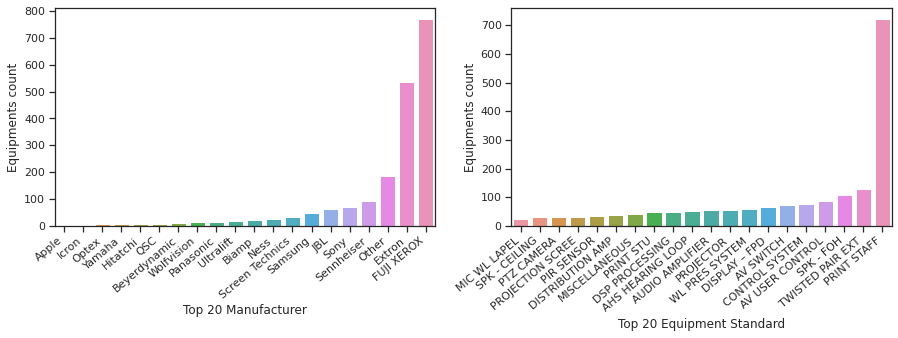

In [0]:
gdf1 = av_equipment_df.groupby(by='Manufacturer', as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf1.sort_values(by=['Equipment Code'], inplace=True)

gdf2 = av_equipment_df.groupby(by='Equipment Standard', as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf2.sort_values(by=['Equipment Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Manufacturer", y='Equipment Code', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Manufacturer', ylabel='Equipments count')

ax2 = sns.barplot(x="Equipment Standard", y='Equipment Code', data=gdf2.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Equipment Standard', ylabel='Equipments count')

plt.show()

#### How is Equipment Status distributed across manufacturers in AV-data?

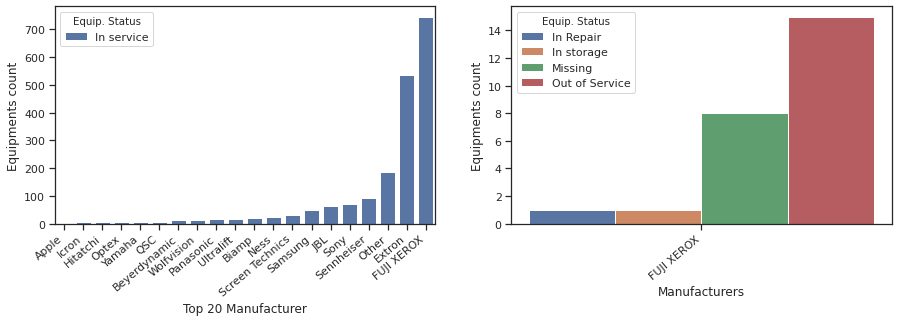

In [0]:
gdf = av_equipment_df.groupby(by=['Manufacturer','Equip. Status'], as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf.sort_values(by=['Equipment Code'], inplace=True)
gdf1 = gdf.loc[(gdf['Equip. Status'] == 'In service')]
gdf2 = gdf.loc[(gdf['Equip. Status'] == 'In storage')|(gdf['Equip. Status'] == 'In Repair')|(gdf['Equip. Status'] == 'Missing')|(gdf['Equip. Status'] == 'Out of Service')]
#gdf.tail(20)
#gdf1.shape
fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Manufacturer", y='Equipment Code', hue='Equip. Status', dodge=False, data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Manufacturer', ylabel='Equipments count')

ax2 = sns.barplot(x="Manufacturer", y='Equipment Code', hue='Equip. Status', dodge=True, data=gdf2, ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Manufacturers', ylabel='Equipments count')

plt.show()

#### How is manufacturer distributed across Buildings and Rooms? (Parkville campus)

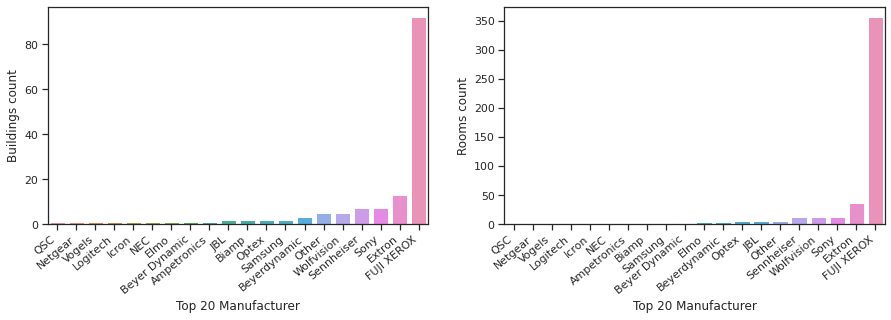

In [0]:
gdf1 = merged_av_equipment_df_clean_PAR.groupby(by='Manufacturer', as_index=False).agg({'Building Code': pd.Series.nunique})
gdf1.sort_values(by=['Building Code'], inplace=True)

gdf2 = merged_av_equipment_df_clean_PAR.groupby(by='Manufacturer', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Manufacturer", y='Building Code', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Manufacturer', ylabel='Buildings count')

ax2 = sns.barplot(x="Manufacturer", y='Room Code', data=gdf2.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Manufacturer', ylabel='Rooms count')

plt.show()

#### How is equipment standard distributed across buildings and rooms? (Parkville campus)

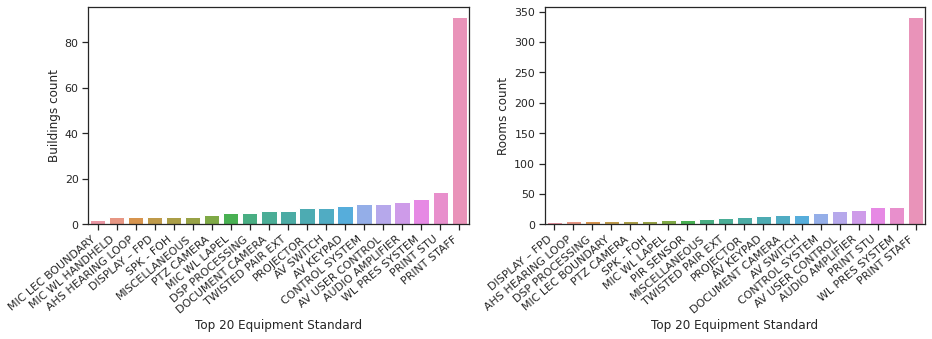

In [0]:
gdf1 = merged_av_equipment_df_clean_PAR.groupby(by='Equipment Standard', as_index=False).agg({'Building Code': pd.Series.nunique})
gdf1.sort_values(by=['Building Code'], inplace=True)

gdf2 = merged_av_equipment_df_clean_PAR.groupby(by='Equipment Standard', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Equipment Standard", y='Building Code', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Equipment Standard', ylabel='Buildings count')

ax2 = sns.barplot(x="Equipment Standard", y='Room Code', data=gdf2.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Equipment Standard', ylabel='Rooms count')

plt.show()

#### How is equipment status distributed across buildings? (Parkville)

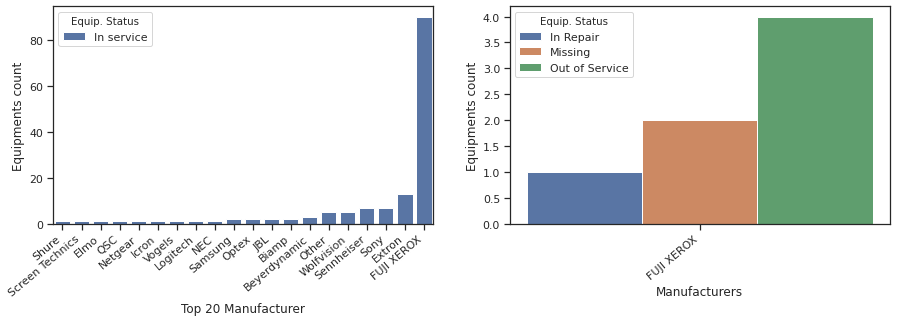

In [0]:
gdf = merged_av_equipment_df_clean_PAR.groupby(by=['Manufacturer','Equip. Status'], as_index=False).agg({'Building Code': pd.Series.nunique})
gdf.sort_values(by=['Building Code'], inplace=True)
gdf1 = gdf.loc[(gdf['Equip. Status'] == 'In service')]
gdf2 = gdf.loc[(gdf['Equip. Status'] == 'In storage')|(gdf['Equip. Status'] == 'In Repair')|(gdf['Equip. Status'] == 'Missing')|(gdf['Equip. Status'] == 'Out of Service')]
#gdf.tail(20)
#gdf1.shape
fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Manufacturer", y='Building Code', hue='Equip. Status', dodge=False, data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Manufacturer', ylabel='Equipments count')

ax2 = sns.barplot(x="Manufacturer", y='Building Code', hue='Equip. Status', dodge=True, data=gdf2, ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Manufacturers', ylabel='Equipments count')

plt.show()

#### Which buildings/room types have the highest number of equipments? (Parkville)

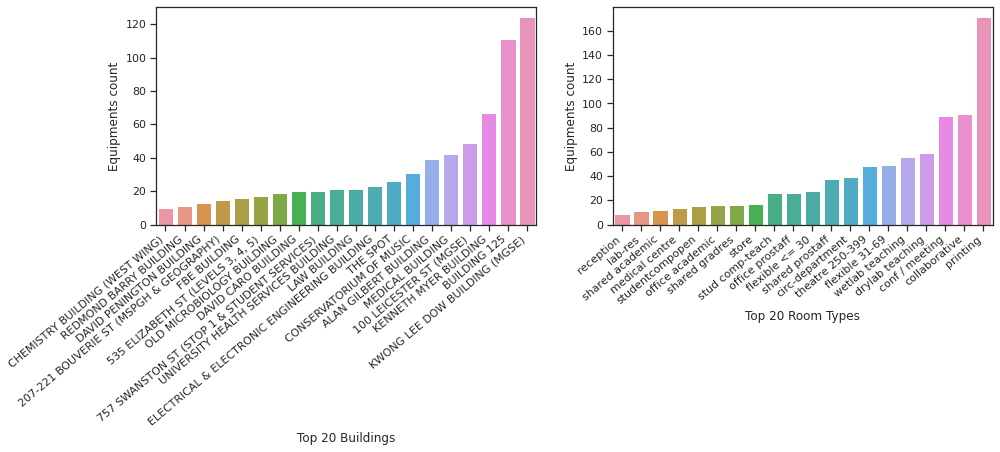

In [0]:
gdf1 = merged_av_equipment_df_clean_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf1.sort_values(by=['Equipment Code'], inplace=True)

gdf2 = merged_av_equipment_df_clean_PAR.groupby(by=['Room Type_x','Room Type Abbreviation_y'], as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf2.sort_values(by=['Equipment Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Building Name", y='Equipment Code', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Buildings', ylabel='Equipments count')

ax2 = sns.barplot(x="Room Type Abbreviation_y", y='Equipment Code', data=gdf2.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Room Types', ylabel='Equipments count')

plt.show()

#### Generally on which floors are AV equipments found? (Parkville)

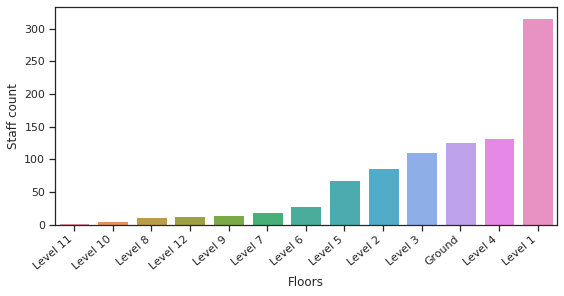

In [0]:
gdf = merged_av_equipment_df_clean_PAR.groupby(by='Floor Name', as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf.sort_values(by=['Equipment Code'], inplace=True)
# gdf['Floor Code_x'] = gdf['Floor Code_x'].astype(str)
# for idx,row in gdf.iterrows():
#     gdf.at[idx,'Floor Code_x'] = 'Level - '+row['Floor Code_x']
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Floor Name", y='Equipment Code', data=gdf);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Floors', ylabel='Staff count')
plt.show()

#### How are equipments distributed in possible staff meeting rooms? (Parkville)

In [0]:
# merged parkville data
merged_av_equipment_in_meeting_rooms_PAR = pd.merge(av_equipment_df,possible_meeting_rooms_df,on=['Campus Code','Building Code','Floor Code','Room Code'])
merged_av_equipment_in_meeting_rooms_PAR.shape

(90, 25)

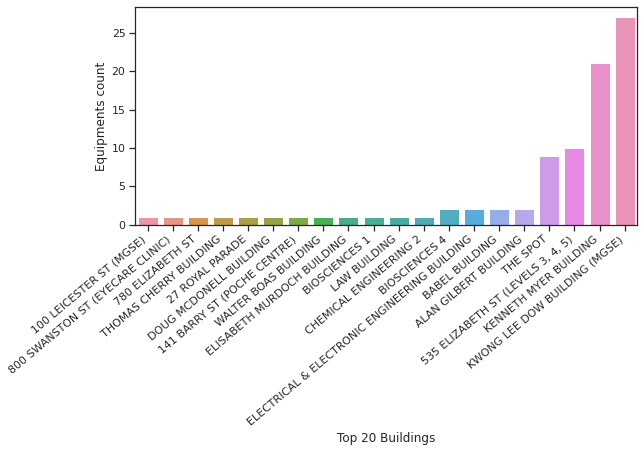

In [0]:
gdf1 = merged_av_equipment_in_meeting_rooms_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf1.sort_values(by=['Equipment Code'], inplace=True)

# gdf2 = merged_av_equipment_in_meeting_rooms_PAR.groupby(by=['Room Type_x','Room Type Abbreviation_y'], as_index=False).agg({'Equipment Code': pd.Series.nunique})
# gdf2.sort_values(by=['Equipment Code'], inplace=True)

# fig, ax = plt.subplots(1,1)
# fig.set_figheight(4)
# fig.set_figwidth(15)
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Building Name", y='Equipment Code', data=gdf1.tail(20));
ax.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Equipments count')

# ax2 = sns.barplot(x="Room Type Abbreviation_y", y='Equipment Code', data=gdf2, ax=ax[1]);
# ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
# ax2.set(xlabel='Room Types', ylabel='Equipments count')

plt.show()

## Student Timetable Data Analysis

In [0]:
timetable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131857 entries, 0 to 131856
Data columns (total 23 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   Host Key of Department                     122653 non-null  float64       
 1   Name of Department                         122653 non-null  object        
 2   Name of Module                             114238 non-null  object        
 3   Description of Module                      114238 non-null  object        
 4   Name                                       122653 non-null  object        
 5   Name of Children                           0 non-null       float64       
 6   Planned Size                               122653 non-null  float64       
 7   Scheduled Start as day name                122653 non-null  object        
 8   Scheduled Start as start time              122653 non-null  object        
 9   Sche

In [17]:
timetable_df.shape

(131857, 23)

In [0]:
timetable_df.head()

,Host Key of Department,Name of Department,Name of Module,Description of Module,Name,Name of Children,Planned Size,Scheduled Start as day name,Scheduled Start as start time,Scheduled Finish as end time,Duration as duration,Name of Allocated Locations,Name of Allocated Locations of Children,Name of Zone of Allocated Locations,Host Key of Allocated Locations,Name of Department of Allocated Locations,Size of Allocated Locations,Teaching week pattern as start week,Activity dates,Teaching week pattern as number of weeks,Name of Type,Scheduled?,Booking?,Building Code,Room Code,Campus Code
0,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-06,12.0,Seminar,t,N,191,WG09,PAR
1,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-13,12.0,Seminar,t,N,191,WG09,PAR
2,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-20,12.0,Seminar,t,N,191,WG09,PAR
3,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-27,12.0,Seminar,t,N,191,WG09,PAR
4,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-04-03,12.0,Seminar,t,N,191,WG09,PAR


#### Data Cleanup

In [18]:
# data cleanup

# remove all NaN rows
timetable_df = timetable_df.dropna(how='all')

# drop duplicate records
timetable_df = timetable_df.drop_duplicates()

timetable_df.shape

(122647, 23)

In [19]:
# dropping classes whose location is not planned
print(len(timetable_df[timetable_df['Host Key of Allocated Locations'].isna()]))

timetable_df = timetable_df[timetable_df['Host Key of Allocated Locations'].notna()]
timetable_df.shape

141


(122506, 23)

In [20]:
# dropping classes whose location is online option
timetable_df = timetable_df[timetable_df['Host Key of Allocated Locations']!='Online option.']
timetable_df.shape

(121535, 23)

In [21]:
# dropping classes with off-site location
timetable_df = timetable_df[timetable_df['Name of Zone of Allocated Locations']!='Off-Site']
timetable_df.shape

(119419, 23)

#### Stats

In [0]:
timetable_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122647 entries, 0 to 131856
Data columns (total 23 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   Host Key of Department                     122647 non-null  float64       
 1   Name of Department                         122647 non-null  object        
 2   Name of Module                             114232 non-null  object        
 3   Description of Module                      114232 non-null  object        
 4   Name                                       122647 non-null  object        
 5   Name of Children                           0 non-null       float64       
 6   Planned Size                               122647 non-null  float64       
 7   Scheduled Start as day name                122647 non-null  object        
 8   Scheduled Start as start time              122647 non-null  object        
 9   Sche

In [0]:
# data stats
stats_timetable_df = {
    'Stats':['Host Key of Department','Name of Department','Name of Module','Name of Allocated Locations','Name of Zone of Allocated Locations','Host Key of Allocated Locations','Activity dates','Teaching week pattern as number of weeks','Name of Type'],
    'Count':[
             len(timetable_df.groupby('Host Key of Department')),
             len(timetable_df.groupby('Name of Department')),
             len(timetable_df.groupby('Name of Module')),
             len(timetable_df.groupby('Name of Allocated Locations')),
             len(timetable_df.groupby('Name of Zone of Allocated Locations')),
             len(timetable_df.groupby('Host Key of Allocated Locations')),
             len(timetable_df.groupby('Activity dates')),
             len(timetable_df.groupby('Teaching week pattern as number of weeks')),
             len(timetable_df.groupby('Name of Type'))
    ]
}
stats = pd.DataFrame(data=stats_timetable_df)
stats

,Stats,Count
0,Host Key of Department,52
1,Name of Department,52
2,Name of Module,1577
3,Name of Allocated Locations,629
4,Name of Zone of Allocated Locations,13
5,Host Key of Allocated Locations,629
6,Activity dates,248
7,Teaching week pattern as number of weeks,23
8,Name of Type,19


#### How are classes distributed across departments?

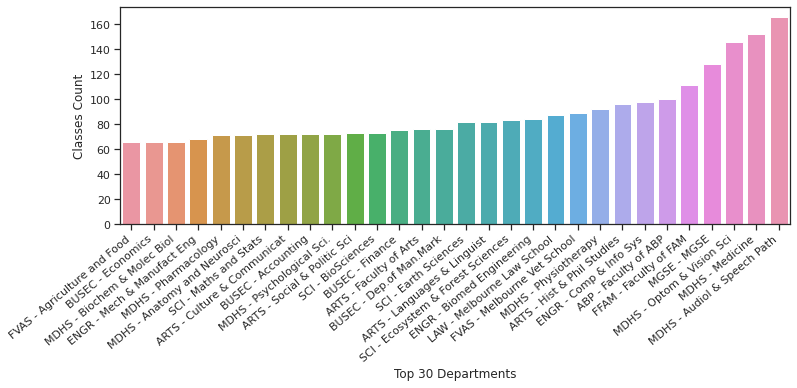

In [0]:
# Top 30 departments
gdf1 = timetable_df.groupby(by=['Name of Department'], as_index=False).agg({'Activity dates':pd.Series.nunique})
gdf1.sort_values(by=['Activity dates'], inplace=True)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Name of Department", y='Activity dates', data=gdf1.tail(30));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 30 Departments', ylabel='Classes Count')
plt.show()

#### How modules are distributed among departments?

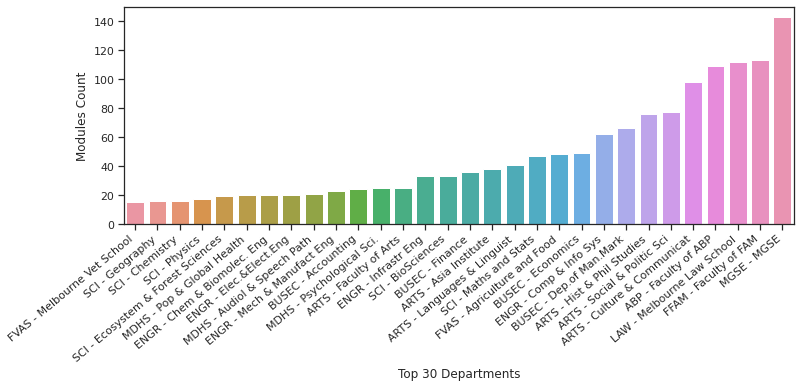

In [0]:
# Top 30 departments
gdf1 = timetable_df.groupby(by=['Name of Department'], as_index=False).agg({'Name of Module':pd.Series.nunique})
gdf1.sort_values(by=['Name of Module'], inplace=True)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Name of Department", y='Name of Module', data=gdf1.tail(30));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 30 Departments', ylabel='Modules Count')
plt.show()

#### Merging with space data

In [0]:
# mutate timetable data

building_codes = []
room_codes = []
campus_codes = []
for idx,row in timetable_df.iterrows():
    s = row['Host Key of Allocated Locations'].split('-')
    building_codes.append(s[0])
    room_codes.append(s[1])
    c = row['Name of Allocated Locations'].split('-')[0]
    if c == 'zzzPAR':
        c = 'PAR'
    campus_codes.append(c)
timetable_df['Building Code'] = building_codes
timetable_df['Room Code'] = room_codes
timetable_df['Campus Code'] = campus_codes

In [24]:
# inner join
merged_timetable_df_clean = pd.merge(timetable_df,merged_space_data_df,on=['Campus Code','Building Code','Room Code'])
merged_timetable_df_clean.shape

(116981, 41)

In [25]:
# left join
merged_timetable_df = pd.merge(timetable_df,merged_space_data_df,on=['Campus Code','Building Code','Room Code'], how='left')
merged_timetable_df.shape

(119419, 41)

In [26]:
merged_timetable_df_clean_PAR = merged_timetable_df[merged_timetable_df['Campus Code']=='PAR']
merged_timetable_df_clean_PAR.shape

(115514, 41)

In [27]:
# records not able to match with space metadata
df = merged_timetable_df[merged_timetable_df['Building Name'].isna()]
print(df.shape)
df.head(2)

(2438, 41)


,Host Key of Department,Name of Department,Name of Module,Description of Module,Name,Name of Children,Planned Size,Scheduled Start as day name,Scheduled Start as start time,Scheduled Finish as end time,Duration as duration,Name of Allocated Locations,Name of Allocated Locations of Children,Name of Zone of Allocated Locations,Host Key of Allocated Locations,Name of Department of Allocated Locations,Size of Allocated Locations,Teaching week pattern as start week,Activity dates,Teaching week pattern as number of weeks,Name of Type,Scheduled?,Booking?,Building Code,Room Code,Campus Code,Building Name,Floor Code,Room Name,Room Category,Room Type,Room Type Abbreviation_x,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code,Floor Name,Room Type Abbreviation_y,Description,Room Type Definition
995,412.0,ENGR - Biomed Engineering,BMEN20001/U/1/SM1,Biomechanical Physics & Computation,BMEN20001/U/1/SM1/P01/07,NaN,20.0,Tuesday,14:15:00,16:15:00,02:00:00,PAR-Engineering D-BM09A (UTM Lab),NaN,PR - Central,176-BM09A,ENGR - Engineering,20.0,13.0,2020-03-24,1.0,Practical,t,N,176,BM09A,PAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,432.0,ENGR - Infrastr Eng,CVEN90050/U/1/SM1,Geotechnical Engineering,CVEN90050/U/1/SM1/W01/12,NaN,24.0,Monday,18:15:00,20:15:00,02:00:00,PAR-Engineering D-BM09B (Undergrad Wet Lab 2 -...,NaN,PR - Central,176-BM09B,ENGR - Engineering,36.0,13.0,2020-03-23,1.0,Workshop,t,N,176,BM09B,PAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Which Buildings are mostly used for classes vs toilet facilities? (Parkville campus)

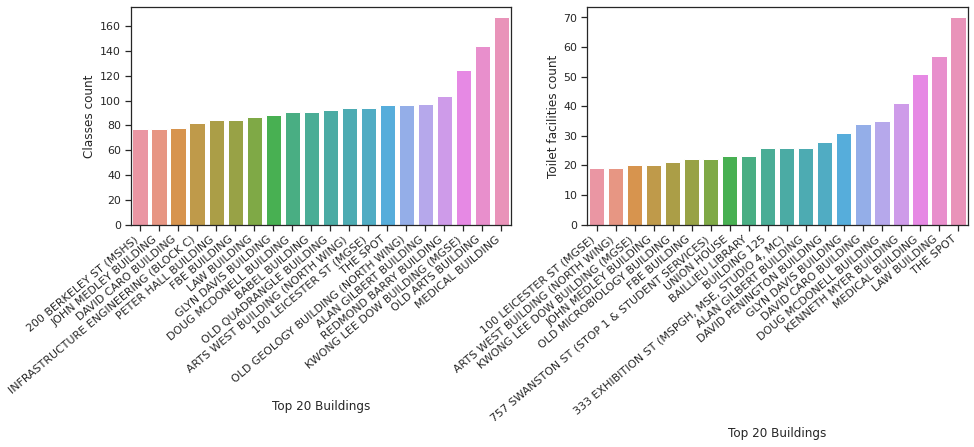

In [0]:
gdf1 = merged_timetable_df_clean_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Activity dates': pd.Series.nunique})
gdf1.sort_values(by=['Activity dates'], inplace=True)

# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilet_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Building Name", y='Activity dates', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Buildings', ylabel='Classes count')

ax2 = sns.barplot(x="Building Name", y='Room Code', data=gdf2.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Buildings', ylabel='Toilet facilities count')

plt.show()

#### Which floors are generally used for classes vs toilet facilities? (Parkville Campus)

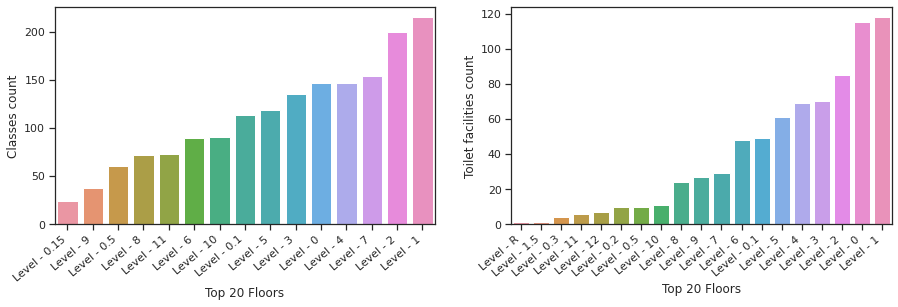

In [0]:
gdf1 = merged_timetable_df_clean_PAR.groupby(by=['Floor Code'], as_index=False).agg({'Activity dates': pd.Series.nunique})
gdf1.sort_values(by=['Activity dates'], inplace=True)
gdf1['Floor Code'] = gdf1['Floor Code'].astype(str)
for idx,row in gdf1.iterrows():
    gdf1.at[idx,'Floor Code'] = 'Level - '+row['Floor Code']

# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilet_df.groupby(by=['Floor Code'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)
gdf2['Floor Code'] = gdf2['Floor Code'].astype(str)
for idx,row in gdf2.iterrows():
    gdf2.at[idx,'Floor Code'] = 'Level - '+row['Floor Code']

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Floor Code", y='Activity dates', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Floors', ylabel='Classes count')

ax2 = sns.barplot(x="Floor Code", y='Room Code', data=gdf2.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Floors', ylabel='Toilet facilities count')

plt.show()

#### Total possible students in a building in entire year vs provided toilet facilites? (Parkville)

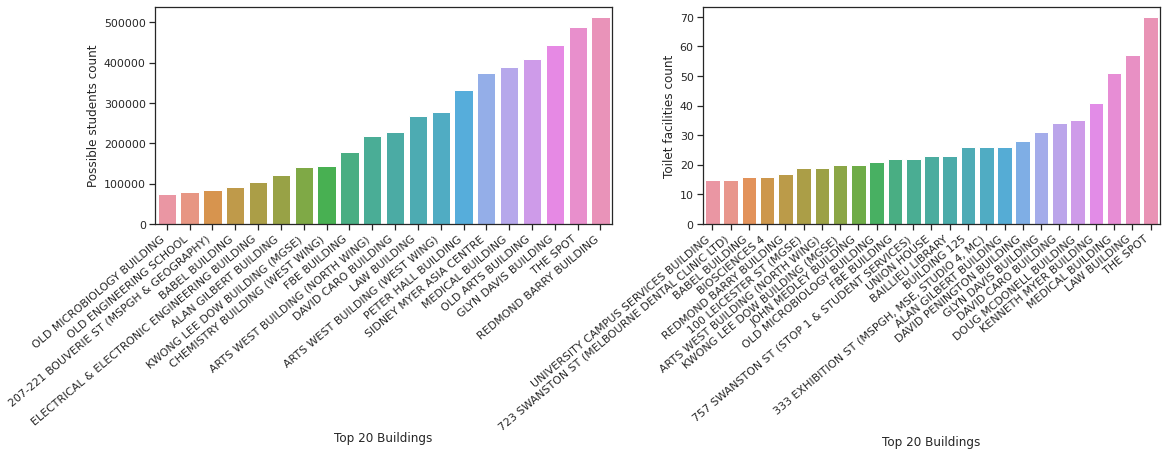

In [0]:
gdf1 = merged_timetable_df_clean_PAR.groupby(by=['Building Code','Building Name'], as_index=False)['Planned Size'].sum()
gdf1.sort_values(by=['Planned Size'], inplace=True)

# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilet_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(18)

ax1 = sns.barplot(x="Building Name", y='Planned Size',data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Buildings', ylabel='Possible students count')

ax2 = sns.barplot(x="Building Name", y='Room Code', data=gdf2.tail(25), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Buildings', ylabel='Toilet facilities count')

plt.show()

#### How many students in Redmond barry building can attend classes at a particular day vs toilet facilities? (Parkville)

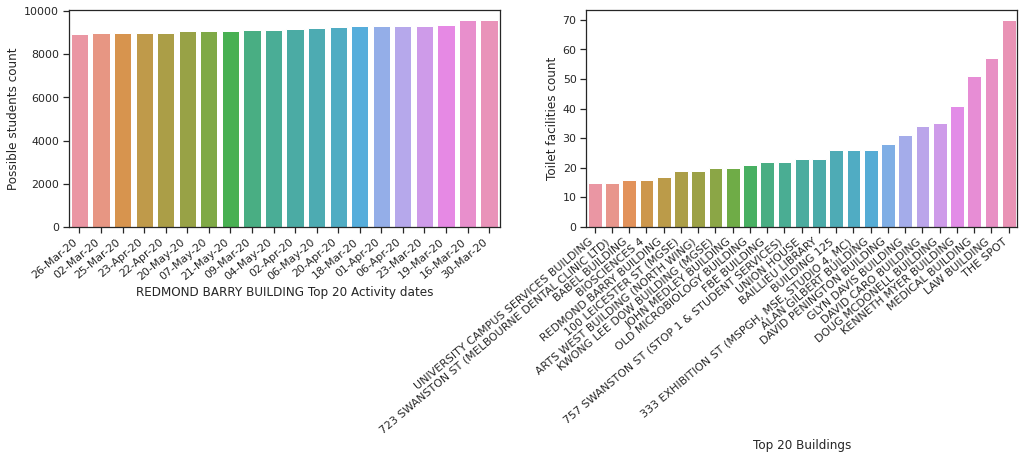

In [0]:
f1 = merged_timetable_df_clean_PAR[merged_timetable_df_clean_PAR['Building Name']=='REDMOND BARRY BUILDING']
gdf1 = f1.groupby(by=['Activity dates'], as_index=False)['Planned Size'].sum()
gdf1.sort_values(by=['Planned Size'], inplace=True)
gdf1['Activity dates'].dt.strftime('%Y-%m-%d')
dates = []
for idx,row in gdf1.iterrows():
    dates.append(row['Activity dates'].strftime('%d-%b-%y'))
gdf1['Activity dates 2']=dates
# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilet_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Activity dates 2", y='Planned Size',data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='REDMOND BARRY BUILDING Top 20 Activity dates', ylabel='Possible students count')

ax2 = sns.barplot(x="Building Name", y='Room Code', data=gdf2.tail(25), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Buildings', ylabel='Toilet facilities count')

plt.show()

## Connecting problem with above analysis (Parkville)

In [0]:
uom_space_df_parkville = merged_space_data_df[merged_space_data_df['Campus Code']=='PAR']

### Staff Meeting Rooms

#### Supply of Meeting Rooms?

In [0]:
# possible meeting rooms
possible_rooms = rm_category_type_df[rm_category_type_df['Room Type'].str.contains("601|629")]
meeting_room_types = possible_rooms['Room Type'].tolist()

# supply of meeting rooms
possible_meeting_rooms_df = uom_space_df_parkville[uom_space_df_parkville['Room Type'].isin(meeting_room_types)]
possible_meeting_rooms_df.shape

(692, 18)

#### Supply of meeting rooms with equipments?

In [0]:
# merged parkville data
meeting_rooms_av_equipment_df = pd.merge(av_equipment_df,possible_meeting_rooms_df,on=['Campus Code','Building Code','Floor Code','Room Code'])
meeting_rooms_av_equipment_df.shape

(90, 25)

#### Demand of Meeting Rooms?

In [0]:
# Number of staff members data in parkville
merged_em_location_df_clean_PAR = pd.merge(em_location_df,uom_space_df_parkville,on=['Building Code','Floor Code','Room Code'])
merged_em_location_df_clean_PAR.shape

(6505, 19)

#### Supply vs demand of meeting rooms across buildings with 'Excellent' Room Condition factor?

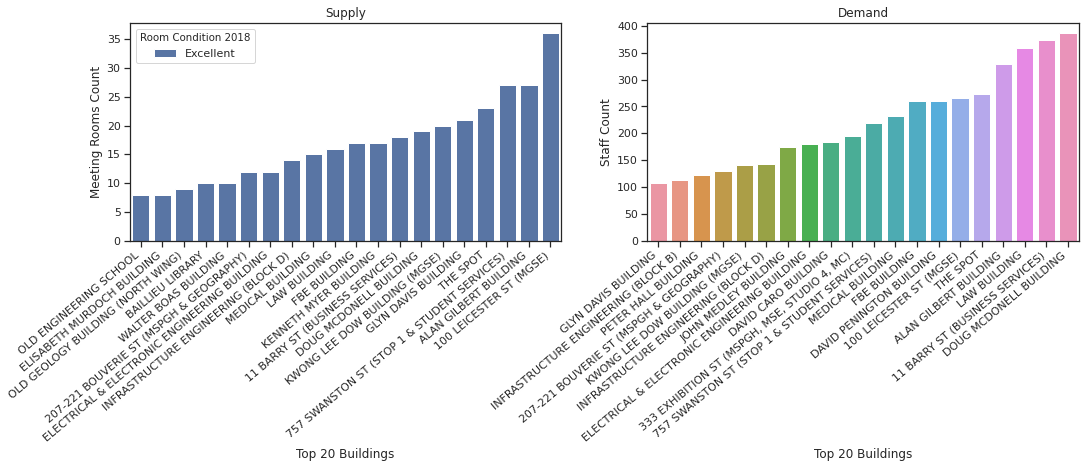

In [0]:
gdf1 = possible_meeting_rooms_df.groupby(by=['Building Code','Building Name','Room Condition 2018'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = merged_em_location_df_clean_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Building Name", y='Room Code', hue='Room Condition 2018', dodge=False, data=gdf1.tail(20),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Buildings', ylabel='Meeting Rooms Count')
ax1.set_title('Supply')

ax2 = sns.barplot(x="Building Name", y='Employee Sequential ID', data=gdf2.tail(20),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Buildings', ylabel='Staff Count')
ax2.set_title('Demand')

plt.show()

#### Supply vs demand of meeting rooms across floors with 'Excellent' Room Condition factor?

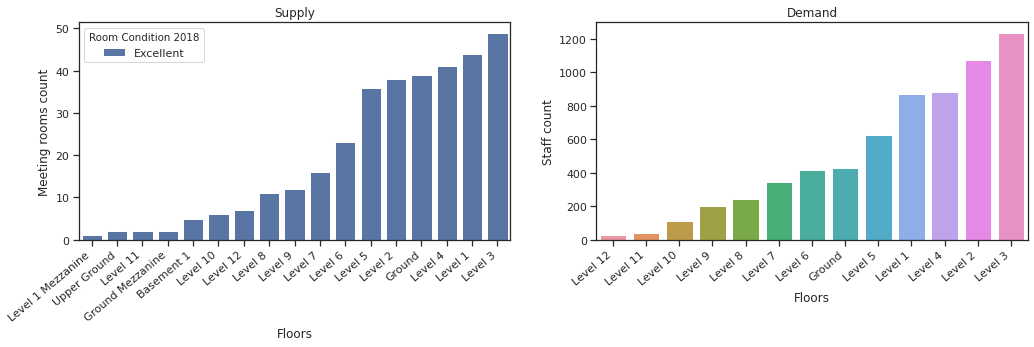

In [0]:
possible_meeting_rooms_df_f = possible_meeting_rooms_df[possible_meeting_rooms_df['Room Condition 2018']=='Excellent']
gdf1 = possible_meeting_rooms_df_f.groupby(by=['Floor Name','Room Condition 2018'], as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = merged_em_location_df_clean_PAR.groupby(by='Floor Name', as_index=False).agg({'Employee Sequential ID': pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Floor Name", y='Room Code', hue='Room Condition 2018', dodge=False, data=gdf1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Floors', ylabel='Meeting rooms count')
ax1.set_title('Supply')

ax2 = sns.barplot(x="Floor Name", y='Employee Sequential ID', data=gdf2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Floors', ylabel='Staff count')
ax2.set_title('Demand')

plt.show()

#### Supply vs demand of meeting rooms across Departments?

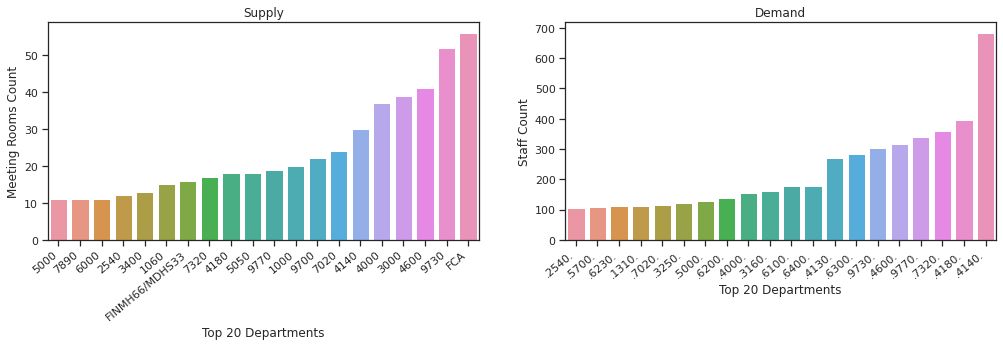

In [0]:
gdf1 = possible_meeting_rooms_df.groupby(by=['Department Code'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = merged_em_location_df_clean_PAR.groupby(by=['Department Code'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

for idx,row in gdf2.iterrows():
    gdf2.at[idx,'Department Code'] = '.'+row['Department Code']+'.'

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Department Code", y='Room Code', data=gdf1.tail(20),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Departments', ylabel='Meeting Rooms Count')
ax1.set_title('Supply')

ax2 = sns.barplot(x="Department Code", y='Employee Sequential ID', data=gdf2.tail(20),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Departments', ylabel='Staff Count')
ax2.set_title('Demand')

plt.show()

#### Supply vs demand of meeting rooms with equipment as a factor (preference)?

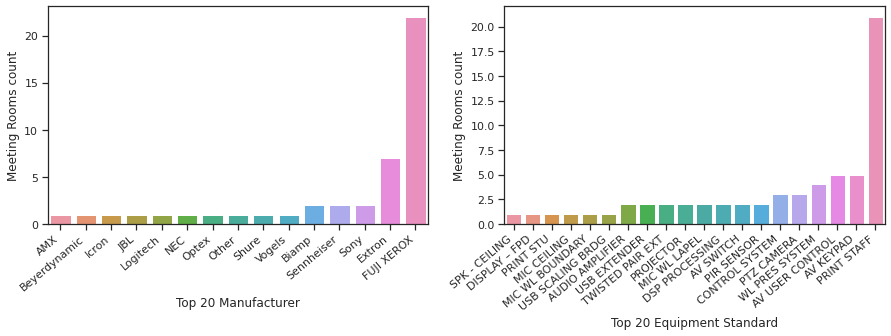

In [0]:
gdf1 = meeting_rooms_av_equipment_df.groupby(by='Manufacturer', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = meeting_rooms_av_equipment_df.groupby(by='Equipment Standard', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Manufacturer", y='Room Code', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Manufacturer', ylabel='Meeting Rooms count')

ax2 = sns.barplot(x="Equipment Standard", y='Room Code', data=gdf2.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Equipment Standard', ylabel='Meeting Rooms count')

plt.show()

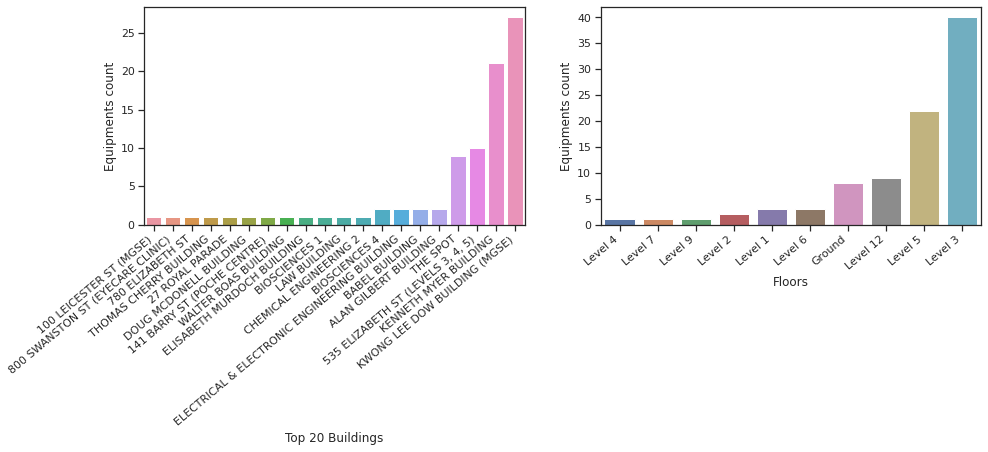

In [0]:
gdf1 = meeting_rooms_av_equipment_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf1.sort_values(by=['Equipment Code'], inplace=True)

gdf2 = meeting_rooms_av_equipment_df.groupby(by=['Floor Code','Floor Name'], as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf2.sort_values(by=['Equipment Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Building Name", y='Equipment Code', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Buildings', ylabel='Equipments count')

ax2 = sns.barplot(x="Floor Name", y='Equipment Code', data=gdf2, ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Floors', ylabel='Equipments count')

plt.show()

### Student Toilets

#### Supply of toilet facilities?

In [16]:
possible_rooms = rm_category_type_df[rm_category_type_df['Room Type Definition'].str.contains("toilet|washroom")]
toilet_room_types = possible_rooms['Room Type'].tolist()

possible_toilet_df = uom_space_df_parkville[uom_space_df_parkville['Room Type'].isin(toilet_room_types)]
possible_toilet_df.shape

(1217, 18)

#### Demand of toilet facilities ?

In [28]:
merged_timetable_df_clean_PAR.shape

(115514, 41)

#### Supply vs demand of toilet facilities across buildings?

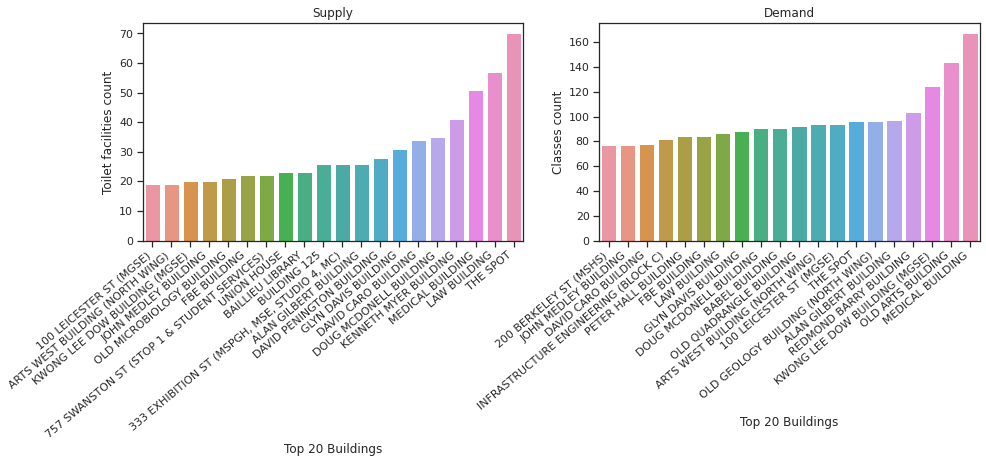

In [30]:
gdf1 = merged_timetable_df_clean_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Activity dates': pd.Series.nunique})
gdf1.sort_values(by=['Activity dates'], inplace=True)

# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilet_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Building Name", y='Room Code', data=gdf2.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Buildings', ylabel='Toilet facilities count')
ax1.set_title("Supply")

ax2 = sns.barplot(x="Building Name", y='Activity dates', data=gdf1.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Buildings', ylabel='Classes count')
ax2.set_title("Demand")
plt.show()

#### Supply vs Demand of toilet facilities across floors?

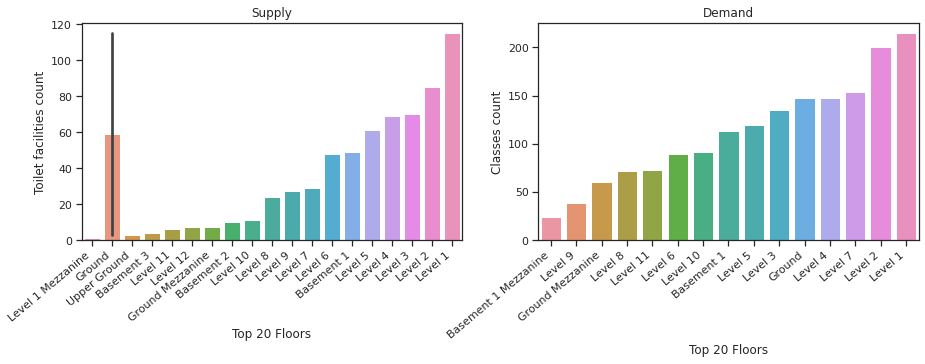

In [36]:
gdf1 = merged_timetable_df_clean_PAR.groupby(by=['Floor Code','Floor Name'], as_index=False).agg({'Activity dates': pd.Series.nunique})
gdf1.sort_values(by=['Activity dates'], inplace=True)
# gdf1['Floor Code'] = gdf1['Floor Code'].astype(str)
# for idx,row in gdf1.iterrows():
#     gdf1.at[idx,'Floor Code'] = 'Level - '+row['Floor Code']

# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilet_df.groupby(by=['Floor Code','Floor Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)
# gdf2['Floor Code'] = gdf2['Floor Code'].astype(str)
# for idx,row in gdf2.iterrows():
#     gdf2.at[idx,'Floor Code'] = 'Level - '+row['Floor Code']

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)

ax1 = sns.barplot(x="Floor Name", y='Room Code', data=gdf2.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Floors', ylabel='Toilet facilities count')
ax1.set_title('Supply')

ax2 = sns.barplot(x="Floor Name", y='Activity dates', data=gdf1.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Floors', ylabel='Classes count')
ax2.set_title('Demand')

plt.show()

#### Supply vs Demand with respect to possible total number of students in a year?

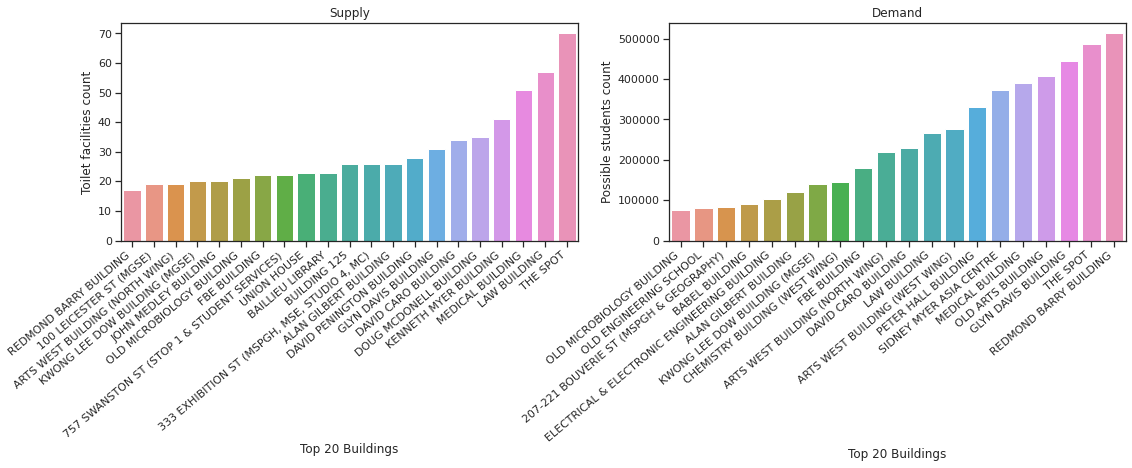

In [40]:
gdf1 = merged_timetable_df_clean_PAR.groupby(by=['Building Code','Building Name'], as_index=False)['Planned Size'].sum()
gdf1.sort_values(by=['Planned Size'], inplace=True)

# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilet_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(18)

ax1 = sns.barplot(x="Building Name", y='Planned Size',data=gdf1.tail(20), ax=ax[1]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Buildings', ylabel='Possible students count')
ax1.set_title('Demand')
ax2 = sns.barplot(x="Building Name", y='Room Code', data=gdf2.tail(21), ax=ax[0]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Buildings', ylabel='Toilet facilities count')
ax2.set_title('Supply')
plt.show()

#### Supply vs Demand of Redmond barry building on different activity dates?

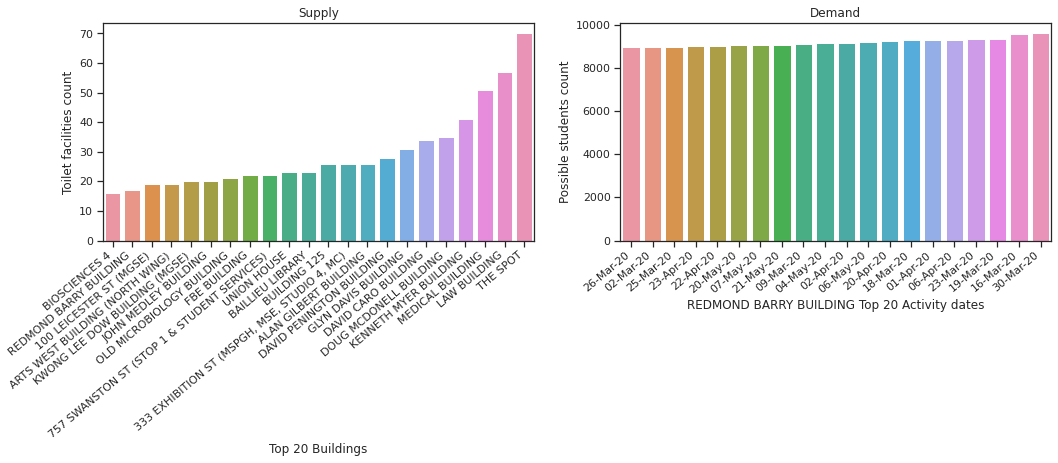

In [49]:
f1 = merged_timetable_df_clean_PAR[merged_timetable_df_clean_PAR['Building Name']=='REDMOND BARRY BUILDING']
gdf1 = f1.groupby(by=['Activity dates'], as_index=False)['Planned Size'].sum()
gdf1.sort_values(by=['Planned Size'], inplace=True)
gdf1['Activity dates'].dt.strftime('%Y-%m-%d')
dates = []
for idx,row in gdf1.iterrows():
    dates.append(row['Activity dates'].strftime('%d-%b-%y'))
gdf1['Activity dates 2']=dates
# Top 20 buildings with the highest number of toilet facilities
gdf2 = possible_toilet_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Activity dates 2", y='Planned Size',data=gdf1.tail(20), ax=ax[1]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='REDMOND BARRY BUILDING Top 20 Activity dates', ylabel='Possible students count')
ax1.set_title('Demand')
ax2 = sns.barplot(x="Building Name", y='Room Code', data=gdf2.tail(22), ax=ax[0]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Buildings', ylabel='Toilet facilities count')
ax2.set_title('Supply')
plt.show()